In [ ]:
# C is the factor in logistic dat affects the non linearity

In [ ]:
from sklearn.datasets import fetch_lfw_people
faces = fetch_lfw_people(min_faces_per_person=80)
print(faces.target_names)
print(faces.images.shape)

['Colin Powell' 'Donald Rumsfeld' 'George W Bush' 'Gerhard Schroeder'
 'Tony Blair']
(1140, 62, 47)


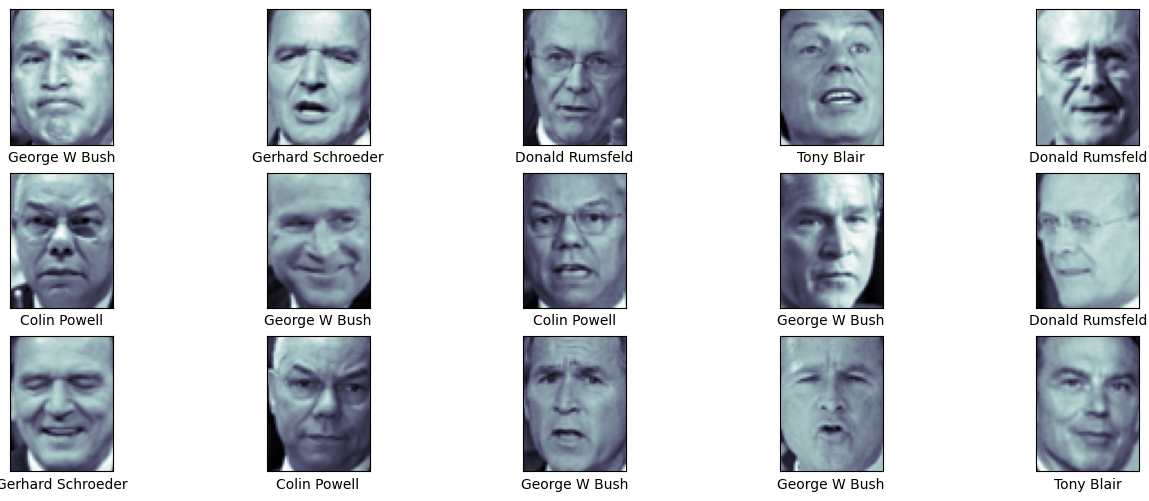

In [ ]:
fig, ax = plt.subplots(3,5, figsize=(16,6))
for i, axi in enumerate(ax.flat):
  axi.imshow(faces.images[i], cmap='bone')
  axi.set(xticks=[], yticks=[],
          xlabel=faces.target_names[faces.target[i]])

pipeline is used for data coming cntinuously, no need for working on evtg sepretly

In [ ]:
from sklearn.svm import SVC
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline

In [ ]:
pca = PCA(n_components=150, whiten=True, random_state=42)
svc = SVC(kernel='rbf', class_weight='balanced')
model = make_pipeline(pca, svc)

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(faces.data, faces.target, random_state=42)

In [ ]:
from sklearn.model_selection import GridSearchCV
param_grid = {'svc__C': [1,5,10,50],
              'svc__gamma': [0.0001, 0.0005, 0.001, 0.005]}
grid = GridSearchCV(model, param_grid)
%time grid.fit(x_train, y_train)
print(grid.best_params_)


CPU times: user 1min 22s, sys: 22.2 s, total: 1min 44s
Wall time: 1min 14s
{'svc__C': 1, 'svc__gamma': 0.005}


In [ ]:
model = grid.best_estimator_
y_fit = model.predict(x_test)
print(y_fit)

[0 0 2 3 2 0 0 4 2 2 4 2 1 0 2 0 4 4 2 0 0 2 1 4 2 3 4 2 2 1 3 1 1 0 0 0 2
 0 3 4 2 2 2 2 0 4 0 2 2 0 2 0 2 0 2 2 2 2 2 0 2 2 2 0 0 3 3 2 0 2 4 2 1 3
 2 2 2 4 2 2 0 2 2 2 3 2 2 3 0 1 2 2 2 4 2 0 2 0 2 3 2 3 2 4 2 1 2 1 2 2 3
 2 2 1 0 2 2 1 2 1 2 0 2 0 0 1 3 1 2 4 2 4 0 0 4 2 3 4 0 3 2 0 2 1 1 0 3 2
 2 2 0 2 2 4 2 3 4 0 0 4 0 2 2 1 0 1 2 0 2 0 1 2 2 2 0 2 1 2 2 4 4 0 4 2 4
 0 2 1 2 2 2 2 2 2 0 0 0 2 0 2 0 3 0 3 2 2 0 1 0 2 3 4 4 0 2 1 2 2 2 2 2 3
 0 2 1 2 0 2 2 2 2 0 2 2 4 4 2 0 2 2 1 2 2 0 2 0 0 2 0 2 0 3 0 0 2 3 1 2 0
 0 3 2 2 1 4 2 1 0 4 3 4 3 2 0 0 1 4 1 0 3 2 0 2 1 4]


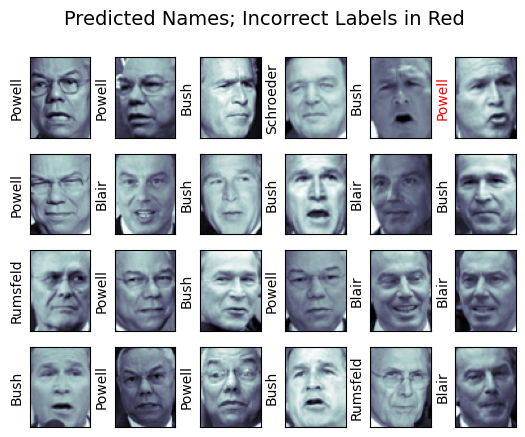

In [ ]:
fig, ax = plt.subplots(4,6)
for i, axi in enumerate(ax.flat):
  axi.imshow(x_test[i].reshape(62,47), cmap='bone')
  axi.set(xticks=[], yticks=[])
  axi.set_ylabel(faces.target_names[y_fit[i]].split()[-1],
                 color='black' if y_fit[i] == y_test[i] else 'red')
  fig.suptitle('Predicted Names; Incorrect Labels in Red', size=14)

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_fit,
                            target_names=faces.target_names))

                   precision    recall  f1-score   support

     Colin Powell       0.86      0.95      0.90        64
  Donald Rumsfeld       0.87      0.84      0.86        32
    George W Bush       0.95      0.93      0.94       127
Gerhard Schroeder       0.89      0.83      0.86        29
       Tony Blair       0.91      0.88      0.89        33

         accuracy                           0.91       285
        macro avg       0.90      0.89      0.89       285
     weighted avg       0.91      0.91      0.91       285

